# Non-Maximum Suppression (NMS) Explained: Step-by-Step with Python

This notebook demonstrates the concept of Non-Maximum Suppression (NMS), a key technique in object detection for filtering overlapping bounding boxes based on confidence scores. Using a sample image of a golden retriever, we visualize predicted boxes, apply NMS with varying IoU thresholds, and observe how the algorithm selects the best boxes. Step-by-step visuals and code help illustrate how NMS works in practice, making it easier to understand its impact on object detection results.

## Imports

In [243]:
%pip install numpy matplotlib opencv-python --quiet

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\Brian\OneDrive - University of Witwatersrand\Desktop\off_the_grid\hulela_blogs\september_2025\nms_explained\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [244]:
import cv2
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np

plt.style.use("dark_background")

## Show Image

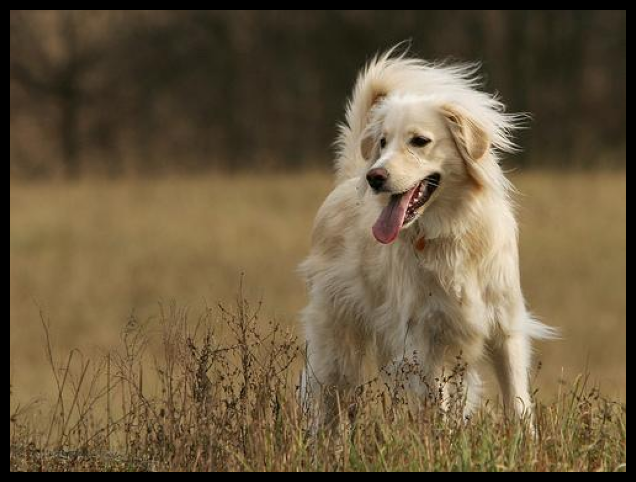

In [245]:
# Load the image
image = cv2.cvtColor(cv2.imread("golden_retriever.jpg"), cv2.COLOR_BGR2RGB)

# Display the image
plt.figure(figsize=(8, 6))
plt.imshow(image)
plt.axis('off')
plt.show()

## Define Boxes and Scores

In [246]:
# Example predicted boxes and scores (more variation)
boxes = [
    [190, 30, 440, 335],   # Box A
    [210, 20, 460, 345],   # Box B
    [180, 40, 430, 330],   # Box C
    [200, 25, 450, 340],   # Box D
]

scores = [0.85, 0.8, 0.75, 0.96]  # Example confidence scores

# Predefined colors for consistent visualization
colors = ['r', 'y', 'b', 'lime']

## Plot Boxes

In [247]:
def plot_boxes(image, boxes, scores=None, title="", filename=None, colors=None):
    fig, ax = plt.subplots(figsize=(8,6))
    ax.imshow(image)
    
    for i, box in enumerate(boxes):
        x1, y1, x2, y2 = box
        rect = patches.Rectangle(
            (x1, y1), x2-x1, y2-y1,
            linewidth=2,
            edgecolor=colors[i] if colors else 'w',
            facecolor='none',
        )
        ax.add_patch(rect)
        if scores is not None:
            ax.text(
                x1, y1-5, f"{scores[i]:.2f}",
                color=colors[i] if colors else 'w',
                fontsize=12
            )
    
    plt.axis('off')
    if filename:
        plt.savefig(filename, bbox_inches="tight", pad_inches=0)
    plt.show()

## Show All Boxes Together

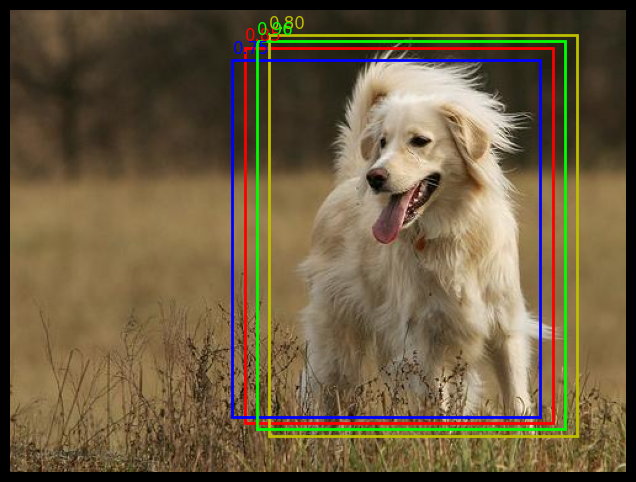

In [248]:
plot_boxes(
    image,
    boxes,
    scores=scores,
    title="Original Predictions",
    filename="original_predictions.png",
    colors=colors
)

## IOU Function

In [249]:
def iou(box1, box2):
    x1 = max(box1[0], box2[0])
    y1 = max(box1[1], box2[1])
    x2 = min(box1[2], box2[2])
    y2 = min(box1[3], box2[3])
    
    inter_area = max(0, x2-x1) * max(0, y2-y1)
    box1_area = (box1[2]-box1[0]) * (box1[3]-box1[1])
    box2_area = (box2[2]-box2[0]) * (box2[3]-box2[1])
    
    return inter_area / (box1_area + box2_area - inter_area)

## Non-Maximum Suppression

In [250]:
def non_max_suppression(boxes, scores, iou_threshold=0.5):
    boxes = np.array(boxes)
    scores = np.array(scores)
    indices = np.argsort(scores)[::-1]
    keep = []
    
    while len(indices) > 0:
        current = indices[0]
        keep.append(current)
        rest = indices[1:]
        ious = np.array([iou(boxes[current], boxes[i]) for i in rest])
        indices = rest[ious <= iou_threshold]
    
    return boxes[keep], scores[keep], [i for i in keep]

## Apply NMS with step-by-step visualization

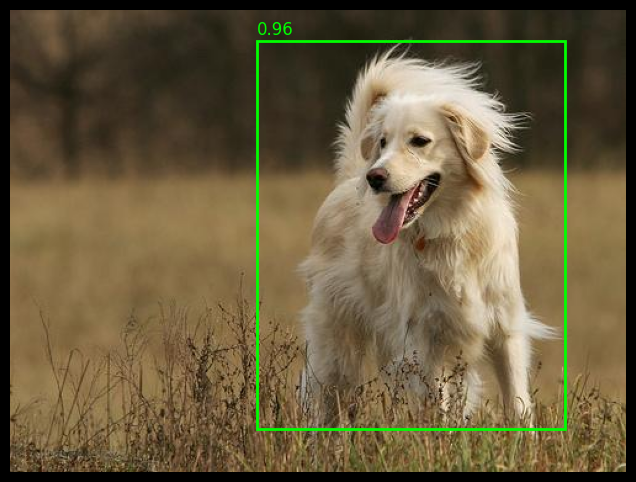

In [251]:
threshold = 0.5

nms_boxes, nms_scores, keep_indices = non_max_suppression(boxes, scores, iou_threshold=threshold)
kept_colors = [colors[i] for i in keep_indices]
    
plot_boxes(
    image,
    nms_boxes,
    scores=nms_scores,
    title=f"NMS Filtered Boxes (IoU={threshold})",
    filename=f"nms_{int(threshold*100)}.png",
    colors=kept_colors
)